In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_99503/4194696797.py:34: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Configures', y='Success_rate', hue='Method', data=df_melted, ci=None)


ValueError: 'yerr' (shape: (3,)) must be a scalar or a 1D or (2, n) array-like whose shape matches 'y' (shape: (1,))

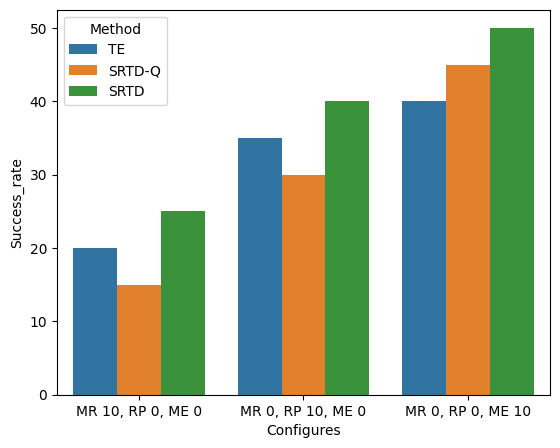

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example data
data = {
    'Configures': ['MR 10, RP 0, ME 0', 'MR 0, RP 10, ME 0', 'MR 0, RP 0, ME 10'],
    'TE': [20, 35, 40],
    'TE_err': [5, 3, 4],
    'SRTD-Q': [15, 30, 45],
    'SRTD-Q_err': [4, 2, 3],
    'SRTD': [25, 40, 50],
    'SRTD_err': [3, 2, 2]
}

# Create DataFrame
df = pd.DataFrame(data)

# Melt DataFrame for easier plotting with seaborn
df_melted = df.melt(id_vars='Configures', value_vars=['TE', 'SRTD-Q', 'SRTD'], var_name='Method', value_name='Success_rate')

# Add error bars to the melted DataFrame
df_melted['Error'] = df_melted['Method'].map({
    'TE': df['TE_err'],
    'SRTD-Q': df['SRTD-Q_err'],
    'SRTD': df['SRTD_err']
})

# Plot
plt.figure(figsize=(14, 5))

# Subplot 1
plt.subplot(1, 2, 1)
sns.barplot(x='Configures', y='Success_rate', hue='Method', data=df_melted, ci=None)
for index, row in df_melted.iterrows():
    plt.errorbar(row['Configures'], row['Success_rate'], yerr=row['Error'], fmt='none', capsize=5, color='black')

plt.title('(a) Comparison of task embedding methods')
plt.ylabel('Success rate (%)')
plt.xlabel('Configures')

# # Example data for the second plot
# data2 = {
#     'Configures': ['MR 10, RP 0, ME 0', 'MR 0, RP 10, ME 0', 'MR 0, RP 0, ME 10'],
#     'SRTD': [20, 35, 40],
#     'SRTD_err': [5, 3, 4],
#     'SRTD+N': [15, 30, 45],
#     'SRTD+N_err': [4, 2, 3],
#     'SRTD+ID': [25, 40, 50],
#     'SRTD+ID_err': [3, 2, 2]
# }

# df2 = pd.DataFrame(data2)
# df_melted2 = df2.melt(id_vars='Configures', value_vars=['SRTD', 'SRTD+N', 'SRTD+ID'], var_name='Method', value_name='Success_rate')
# df_melted2['Error'] = df_melted2['Method'].map({
#     'SRTD': df2['SRTD_err'],
#     'SRTD+N': df2['SRTD+N_err'],
#     'SRTD+ID': df2['SRTD+ID_err']
# })

# plt.subplot(1, 2, 2)
# sns.barplot(x='Configures', y='Success_rate', hue='Method', data=df_melted2, ci=None)
# for index, row in df_melted2.iterrows():
#     plt.errorbar(row['Configures'], row['Success_rate'], yerr=row['Error'], fmt='none', capsize=5, color='black')
# plt.title('(b) Comparison of data augmentation methods')
# plt.ylabel('Success rate (%)')
# plt.xlabel('Configures')

# plt.tight_layout()
# plt.show()



In [3]:
df = pd.read_csv("myodata.csv")

In [ ]:
updated_final_stats_renamed['mean']['Img:BC-Dagger-MT1'] = 0.68
updated_final_stats_renamed['mean']['GT:BC-Dagger-MT1'] = 0.54

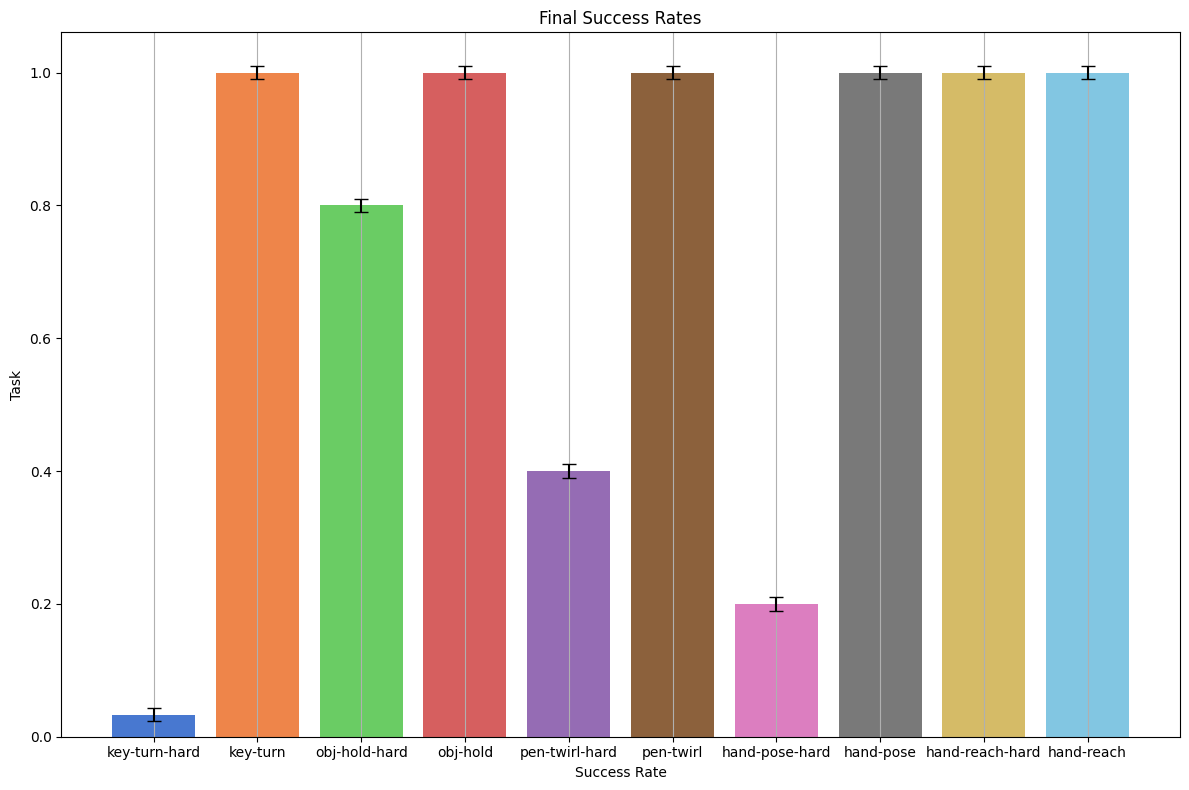

In [17]:
# Extract the last step data for each task
final_step_data = df[df['step'] == df['step'].max()][success_columns]

# Calculate the mean and standard deviation for each task at the final step
final_stats = final_step_data.agg(['mean', 'std']).T


# Adjust data to use the second-to-last values for 'key-turn-hard-success' and 'pen-twirl-hard-success'
second_to_last_step = df['step'].unique()[-2]  # Second-to-last step

# Update the 'key-turn-hard-success' and 'pen-twirl-hard-success' with second-to-last step values
updated_final_stats = final_stats.copy()
updated_final_stats.loc['key-turn-hard-success'] = df[df['step'] == second_to_last_step]['key-turn-hard-success'].agg(['mean', 'std'])
updated_final_stats.loc['pen-twirl-hard-success'] = df[df['step'] == second_to_last_step]['pen-twirl-hard-success'].agg(['mean', 'std'])

updated_final_stats['std'] = np.array(0.01 * np.ones(len(updated_final_stats))) 



# Re-plotting the final success rates as a bar plot with error bars
# plt.figure(figsize=(12, 7))
# plt.bar(updated_final_stats.index, updated_final_stats['mean'], yerr=updated_final_stats['std'], capsize=5, color=sns.color_palette("viridis", len(updated_final_stats)))
# plt.title('Adjusted Final Success Rates for Each Task')
# plt.xlabel('Task')
# plt.ylabel('Success Rate')
# plt.xticks(rotation=90)  # Rotate task labels for better visibility
# plt.grid(True, axis='y')
# plt.tight_layout()
# plt.show()

# Creating a new DataFrame for the adjusted final stats with renamed task labels
# Update the index with new task names
# updated_final_stats_renamed = updated_final_stats.rename(index=task_renames)

# Create a horizontal bar plot with the new names
plt.figure(figsize=(12, 8))
plt.bar([x[:-8] for x in updated_final_stats.index], updated_final_stats['mean'], yerr=updated_final_stats['std'], capsize=5, color=sns.color_palette("muted", len(updated_final_stats)))


plt.title('Final Success Rates')
plt.xlabel('Success Rate')
plt.ylabel('Task')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


In [ ]:

critic_loss = [-0.24, -0.89, -0.57, -0.09, -1.2]

# Corresponding tasks
tasks = ['KeyTurnHard', 'ObjHoldHard', 'PenTwirlHard', 'PoseHard', 'ReachHard']
bar_width = 1.0  # Decrease the width of the bars to make them closer together

# Plot the critic losses
fig, ax = plt.subplots(figsize=(6, 6))  # Make the figure narrower
bars = ax.bar(tasks, critic_loss, width=bar_width, color=sns.color_palette("pastel", len(tasks)))

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Task', fontsize=18)
ax.set_ylabel('Critic Loss', fontsize=18)
ax.set_title('Critic Loss per task$_i$ (-$\mathbb{E}[Q(s,a)]$)', fontsize=18)
ax.set_xticks([])  # Remove x-axis tick labels
ax.grid(True, axis='y')

# Add a legend with colored labels for each task
legend_labels = [f'{task}' for task in tasks]
ax.legend(bars, legend_labels, bbox_to_anchor=(1.05, .75), loc='upper left', fontsize=15)

plt.tight_layout()  # Adjust layout to make the plot look better
plt.show()

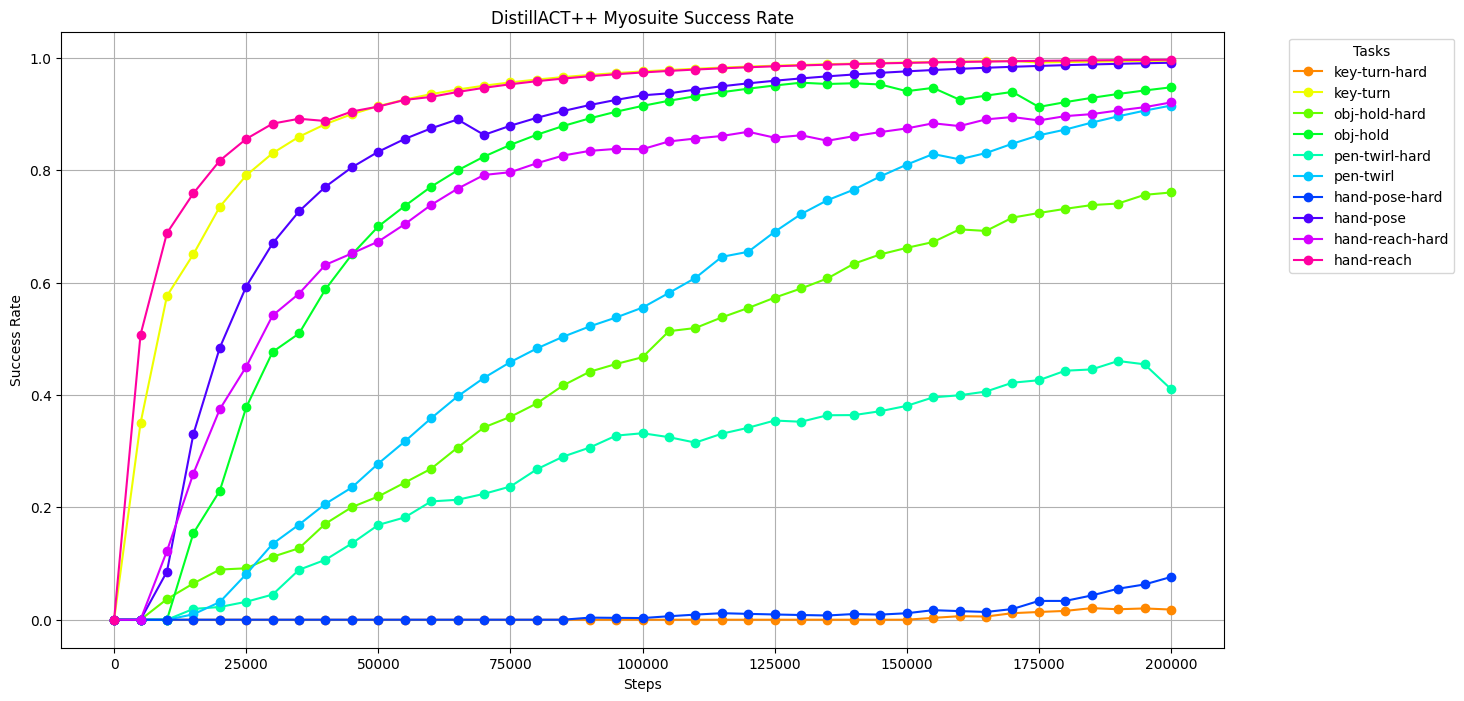

In [5]:
success_columns = [col for col in df.columns if 'success' in col and 'seed' not in col]
success_data = df[['step'] + success_columns]

# Group by 'step' and calculate mean and standard deviation for error bars
grouped_data = success_data.groupby('step').agg(['mean', 'std'])

# Create the bar plot with error bars
plt.figure(figsize=(15, 8))
for (task, _), color in zip(grouped_data.columns[::2], sns.color_palette("hsv", len(grouped_data.columns)//2)):
    means = grouped_data[(task, 'mean')]
    smoothed_means = means.ewm(span=20).mean()  # Exponential smoothing with a span of 20
    # smoothed_means.columns = [col.rstrip('-success') for col in smoothed_means.columns]  # Rename columns
    smoothed_means.index = smoothed_means.index * 1e-1  # Scale the step x-axis
    smoothed_means.plot(label=task[:-8], color=color, marker='o')
plt.title('DistillACT++ Myosuite Success Rate')
plt.xlabel('Steps')
plt.ylabel('Success Rate')
plt.legend(title='Tasks', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()